# Construction of stellar templates


The construction of Stellar templates is handled through the *StellarModel* interface, which will create independent stellar templates for each sub-Instrument that we have available in the *DataClass*. The construction of the stellar templates follows the framework described in Silva et al, 2022, and is shematized in here:

![teste](../diagrams/stellar_template_construction.png)

In [ ]:

from pathlib import Path

from ASTRA.data_objects import DataClassManager
from ASTRA.data_objects.DataClass import DataClass
from ASTRA.Instruments import ESPRESSO
from ASTRA.template_creation.StellarModel import StellarModel

storage_path = Path("../../tmp")
manager = DataClassManager()
manager.start()

d: DataClass = manager.DataClass(
    list(Path("/home/amiguel/spectra_collection/ESPRESSO/proxima").glob("*.fits")),
    storage_path=storage_path,
    instrument=ESPRESSO,
)

stell = StellarModel(
    storage_path,
    user_configs={},
    
)
stell.Generate_Model(
    dataClass=d,
    template_configs={},
    force_computation=True,
)



2025-04-15 14:56:41.420 | DEBUG    | ASTRA.utils.UserConfigs:receive_user_inputs:216 - Generating internal configs of  - 
2025-04-15 14:56:41.424 | INFO     | ASTRA.utils.UserConfigs:receive_user_inputs:221 - Checking for any parameter that will take default value
2025-04-15 14:56:41.426 | DEBUG    | ASTRA.utils.UserConfigs:receive_user_inputs:228 - Configuration <SAVE_DISK_SPACE> using the default value: DISK_SAVE_MODE.DISABLED
2025-04-15 14:56:41.428 | DEBUG    | ASTRA.utils.UserConfigs:receive_user_inputs:228 - Configuration <WORKING_MODE> using the default value: WORKING_MODE.ONE_SHOT
2025-04-15 14:56:41.432 | INFO     | ASTRA.data_objects.DataClass:__init__:126 - DataClass opening 3 files from a list/tuple
2025-04-15 14:56:41.434 | INFO     | ASTRA.base_models.Frame:__init__:252 - Creating frame from: /home/amiguel/spectra_collection/ESPRESSO/proxima/r.ESPRE.2019-07-03T01:43:39.634_S2D_A.fits
2025-04-15 14:56:41.436 | WARNING  | ASTRA.Components.SpectrumComponent:regenerate_order_

## Accessing the templates

After construction of the Stellar template, we can access them independently for each sub-Instrument:

In [4]:
stellar_template = stell.request_data("ESPRESSO19")

This *stellar_template* object will have the same spectra-interfacing as the [Frames](../../spectra/access_spectra):

Text(0, 0.5, 'Flux')

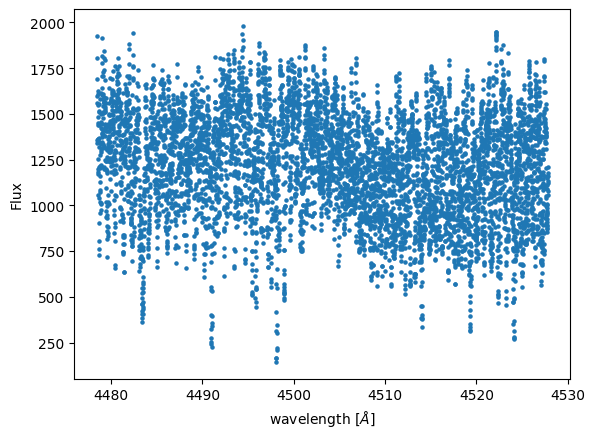

In [6]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
wave, flux, err, mask = stellar_template.get_data_from_spectral_order(order=50)
good_pixel_mask = ~mask
axis.scatter(wave[good_pixel_mask], flux[good_pixel_mask], s=5)
axis.set_xlabel(r"wavelength $[\AA]$")
axis.set_ylabel("Flux")
